## Q7: Noisy signal

SciPy provides a convolution function `scipy.signal.convolve()` that can do the convolution for us directly.  To smooth the data, we want to use a Gaussian, which can be produced by `scipy.signal.gaussian()`.

Convolve the noisy data with a Gaussian and plot the result together with the original data `orig`.  You'll need to play with the width of the Gaussian to get a nice smoothing.  You also will need to normalize the Gaussian so that it sums to 1, otherwise, your convolved data will be shifted verfically from the original function.

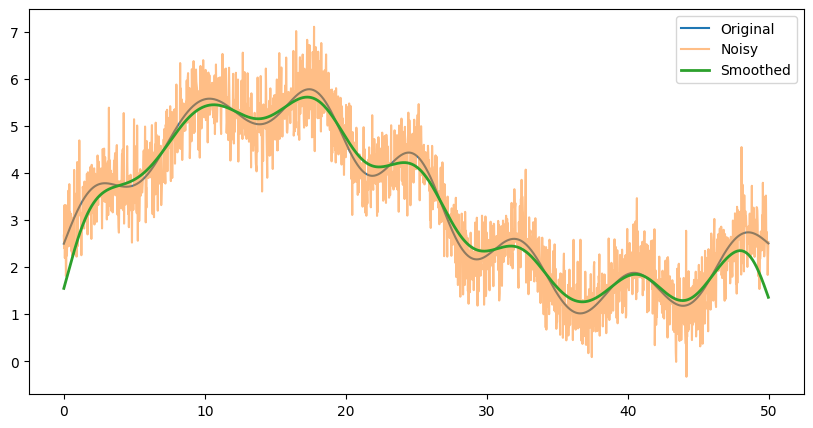

In [3]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt


def fdata(x, L):
    """plots original data over length L"""
    A = L / 10.0
    return (2 * np.sin(2 * np.pi * x / L)
            + x * (L - x)**2 / L**3 * np.cos(x)
            + 5 * x * (L - x) / L**2
            + A / 2
            + 0.1 * A * np.sin(13 * np.pi * x / L))


def norm(f):
    """returns normalised function"""
    n = np.sum(f)
    f = f / n
    return f


def smoothing(x, f, sigma):
    """smoothing function"""
    N = len(x)
    gaus = scipy.signal.windows.gaussian(N, std=sigma, sym=True)
    gaus /= np.sum(gaus)
    conv = scipy.signal.convolve(gaus, f, mode='same')
    return conv


# main
N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5 * np.random.randn(N)
rec = smoothing(x, noisy, 50)

# plot results
plt.figure(figsize=(10, 5))
plt.plot(x, orig, label='Original')
plt.plot(x, noisy, label='Noisy', alpha=0.5)
plt.plot(x, rec, label='Smoothed', linewidth=2)
plt.legend()
plt.show()


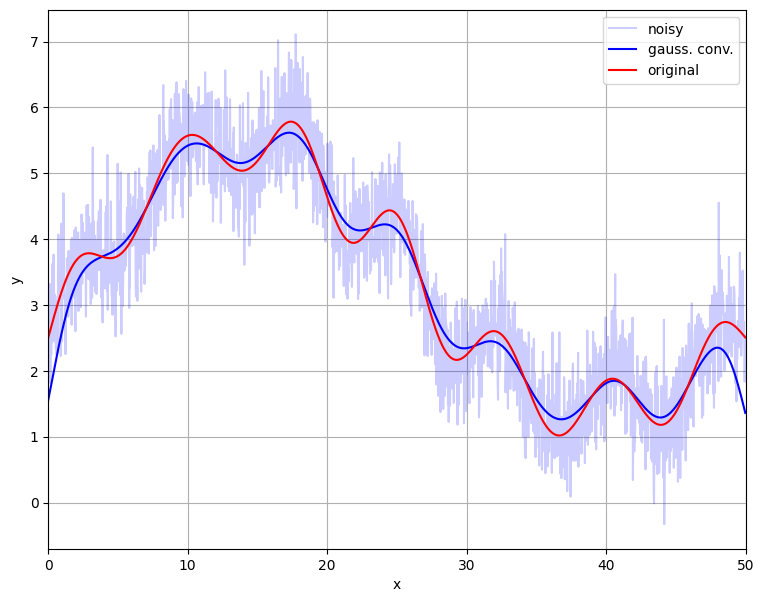

In [4]:
fig = plt.figure(figsize=(9,7), dpi=100)

plt.grid(True)
plt.xlim(0, L)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, noisy, label = 'noisy', color = 'blue', alpha = 0.2)
plt.plot(x, rec, label = 'gauss. conv.', color = 'blue')
plt.plot(x, orig, label = 'original', color = 'red')

plt.legend()

## Q5: Planetary orbits

We want to consider planetary orbits.  To do this, we need to solve Newton's second law together with Newton's law of gravity.  If we restrict ourselves to the x-y plane, then there are 4 quantities we need to solve for: $x$, $y$, $v_x$, and $v_y$.  These evolve according to:

\begin{align*}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= a_x = -\frac{GM_\star x}{r^3} \\
\frac{dv_y}{dt} &= a_y = -\frac{GM_\star y}{r^3}
\end{align*}

To integrate these forward in time, we need an initial condition for each quantity.  We'll setup our system such that the Sun is at the origin (that will be one focus), and the planet begins at perihelion and orbits counterclockwise. 

![orbit_setup.png](attachment:orbit_setup.png)

The distance of perihelion from the focus is:

$$r_p = a (1 - e)$$

where $a$ is the semi-major axis and $e$ is the eccentricity.  The perihelion velocity is all in the $y$ direction and is:

$$v_y = v_p = \sqrt{\frac{GM_\star}{a} \frac{1+e}{1-e}}$$

We'll work in units of AU, years, and solar masses, in which case, $GM_\star = 4\pi^2$ (for the Sun).  

Your initial conditions should be:

  * $x(t=0) = r_p$
  * $y(t=0) = 0$
  * $v_x(t=0) = 0$
  * $v_y(t=0) = v_p$

Here's a righthand side function for the ODEs:


Use the scipy ODE integration methods to integrate an orbit and plot it

Number of orbits completed: 6


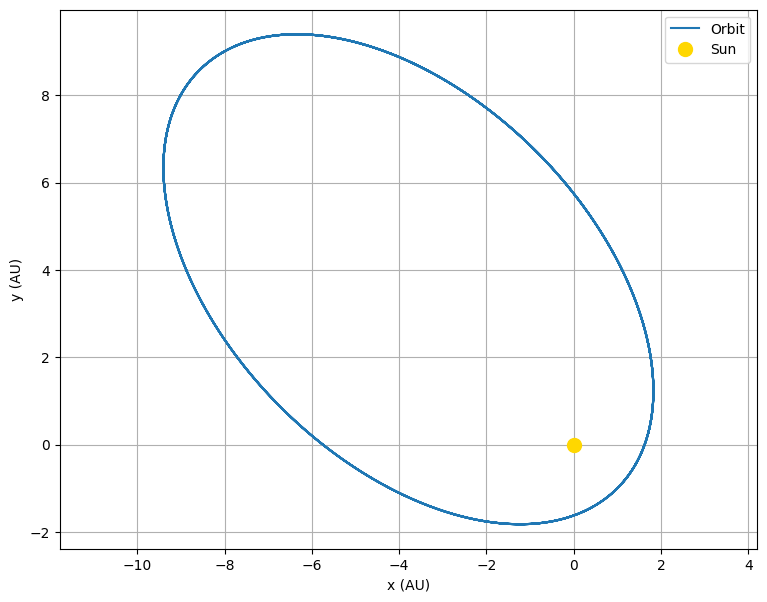

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def rhs(Y, t, GM=4*np.pi**2):
    """RHS for orbits, Y is the solution vector, containing
    x, y, v_x, and v_y"""

    x, y, vx, vy = Y
    f = np.zeros_like(Y)

    # dx/dt = vx
    f[0] = vx

    # dy/dt = vy
    f[1] = vy

    # d(vx)/dt = -GMx/r**3
    r = np.sqrt(x**2 + y**2)
    f[2] = -GM*x/r**3

    # d(vy)/dt = -GMy/r**3
    f[3] = -GM*y/r**3

    return f



def count_orbits(x_values):
    """returns number of orbits completed"""
    orbits = 0
    for i in range(1, len(x_values)):
        if x_values[i-1] > 0 and x_values[i] < 0:
            orbits += 1
    return orbits





#initial conditions
x0 = 1             #initial x-position of the planet at perihelion (in AU)
y0 = -1            #initial y-position of the planet (in AU)
v_peri_x = 5       #initial x-component of velocity at perihelion (in AU/yr)
v_peri_y = 5       #initial y-component of velocity at perihelion (in AU/yr)

#Put initial conditions into an array
initial_state = [x0, y0, v_peri_x, v_peri_y]

#integrate equations
t = np.linspace(0, 100, 100000)  
orbit = odeint(rhs, initial_state, t)
x_orbit, y_orbit = orbit[:, 0], orbit[:, 1]

# Count the number of orbits completed
num_orbits = count_orbits(x_orbit)
print("Number of orbits completed:", num_orbits)


# Plot the orbit
fig = plt.figure(figsize=(9,7), dpi=100)
plt.plot(x_orbit, y_orbit, label='Orbit')
plt.plot(0, 0, 'o', color='gold', markersize=10, label='Sun')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.axis('equal')
plt.legend(loc='best')
plt.grid(True)
plt.show()
